In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [129]:
def parse(file):
    with open(file,'r') as readFile:                                                                                        #convert lines in file to list
        file = readFile.readlines()

    stop = False
    thermData = []
    thermTime = []
    tCoupData = []
    tCoupTime = []
    countLines = 0
    for i in file:
        if 'DATAQ:' in i and not stop:
            tCoupData.append(float(i.split()[4].strip(',')))
            try:
                    tCoupTime.append(float(file[countLines-1].split()[0].strip('()'))/1000)
                    # totalTime.append(float(file[countLines-1].split()[0].strip('()'))/1000)
            except:
                if file[countLines+1].split()[0] != 'DATAQ:':
                    tCoupTime.append(float(file[countLines+1].split()[0].strip('()'))/1000)
                else:
                    try:
                        tCoupTime.append(float(file[countLines-2].split()[0].strip('()'))/1000)
                    except:
                        try:
                            tCoupTime.append(float(file[countLines+2].split()[0].strip('()'))/1000)
                        except:
                            print(file[countLines])
                            tCoupTime.append(float(file[countLines-3].split()[0].strip('()'))/1000)
        elif 'modeled' in i and not stop:
            thermData.append(float(i.split()[4].strip(',')))
            thermTime.append(float(i.split()[0].strip('()'))/1000)
            if float(i.split()[4].strip(',')) > 114:
                stop = True
        
        countLines += 1
    thermTime = np.array(thermTime)-thermTime[0]
    tCoupTime = np.array(tCoupTime)-tCoupTime[0]
    return (thermTime,thermData),(tCoupTime,tCoupData)
def r2(y,fit):
    y = np.array(y)
    fit = np.array(fit)
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2

def test(x,a,b,c):
    return a*np.log(x+b)+c

In [130]:
file = 'data/JW_mod4_tcInMiddle_1.txt'
file2 = 'data/JW_mod4_tcInMiddleWithCupFail_2.txt'
file3 = 'data/JW_mod4_tcInSide_3.txt'

x1,y1 = parse(file)[0]
x2,y2 = parse(file)[1]

x3,y3 = parse(file2)[0]
x4,y4 = parse(file2)[1]

x5,y5 = parse(file3)[0]
x6,y6 = parse(file3)[1]

[  84.40359326    8.11522572 -152.81500366] 
 [  551.12074805   184.93141904 -2848.07427584]


C:\Users\JoshWhitehead\AppData\Local\Temp\ipykernel_8384\2268326598.py:48: RuntimeWarning: invalid value encountered in log
  return a*np.log(x+b)+c


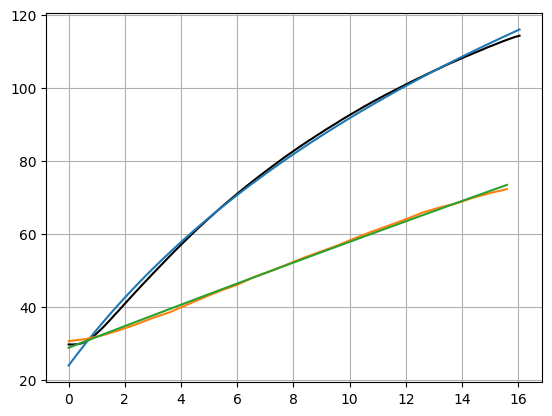

In [131]:
pop1,pcov1 = curve_fit(test,x1,y1)
pop2,pcov2 = curve_fit(test,x2,y2)

plt.plot(x1,y1,color='k')
plt.plot(x1,test(x1,*pop1))
plt.plot(x2,y2)
plt.plot(x2,test(x2,*pop2))
plt.grid()
print(pop1,'\n',pop2)

In [132]:
x0 = interp1d(x1,test(x1,*pop1))
print(x0(0))

23.904345796740813


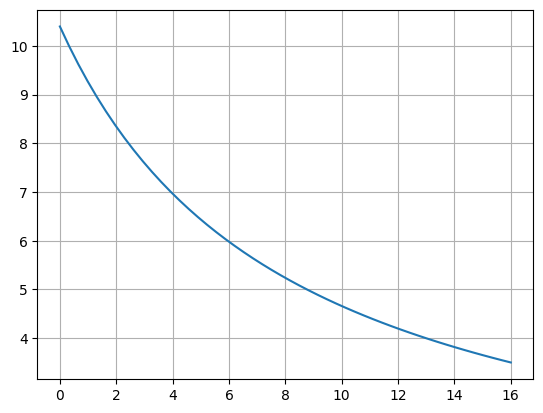

In [133]:
x = np.linspace(0,16)
y = pop1[0]/(x+pop1[1])
plt.plot(x,y)
plt.grid()

In [134]:
a = pop1[0]
c = 8.11522678
L = 2.1/1000
Ti = 30
k = 180
ro = 2770
cp = 875
alpha = k/ro/cp

def TTT(alpha,a,t,c,x,L,Ti):
    return a/2/alpha/(t+c)*x**2-a*L/2/alpha/c*x+Ti

t = np.linspace(0,16)
print(TTT(alpha,a,t,c,L,L,Ti))

[30.         29.9880553  29.97700024 29.966739   29.95718904 29.94827888
 29.93994631 29.93213693 29.92480297 29.91790229 29.9113976  29.90525576
 29.89944724 29.89394563 29.88872721 29.88377068 29.8790568  29.87456818
 29.87028905 29.86620507 29.86230321 29.85857153 29.85499915 29.85157607
 29.84829313 29.8451419  29.8421146  29.83920407 29.83640368 29.83370728
 29.8311092  29.82860415 29.82618723 29.82385386 29.82159979 29.81942103
 29.81731389 29.81527487 29.81330074 29.81138845 29.80953512 29.80773809
 29.80599481 29.80430292 29.80266017 29.80106446 29.79951379 29.79800629
 29.79654017 29.79511375]


In [135]:
newX1 = interp1d(x1,y1)
newX2 = interp1d(x2,y2)
x11 = np.linspace(x1[0],x1[-1])
y11 = newX1(x11)
x22 = np.linspace(x2[0],x2[-1])
y22 = newX2(x22)


In [136]:
def d3fun(xt,a,b,c,d,e):
    x,t = xt
    return a*np.log(t+b)+c + d*x+e
dx = [0,.0021]
x = []
t = []
T = []

for i in dx:
    for u in y22:
        x.append(i)

y = [x11,x22]
z = np.array([y11,y22])
for i in y:
    for u in i:
        t.append(u)
for i in z:
    for u in i:
        T.append(u)
print(len(x),len(t),len(T))


pop3,pcov3 = curve_fit(d3fun,[x,t],T)

100 100 100


C:\Users\JoshWhitehead\AppData\Local\Temp\ipykernel_8384\2082657598.py:3: RuntimeWarning: invalid value encountered in log
  return a*np.log(t+b)+c + d*x+e


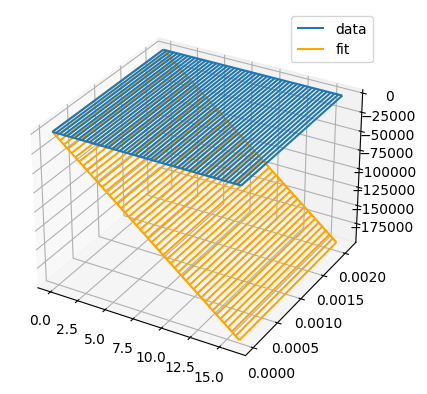

In [137]:
time,dist = np.meshgrid(x11,dx)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(time,dist,z,label='data')
ax.plot_wireframe(time,dist,d3fun([time,dist],*pop3),color='orange',label='fit')
ax.legend()
plt.show()

0.9228141564075591
25.612895171299115 2.980341814041668 -32.384342944334364
17.38401951910697


C:\Users\JoshWhitehead\AppData\Local\Temp\ipykernel_8384\2268326598.py:48: RuntimeWarning: invalid value encountered in log
  return a*np.log(x+b)+c


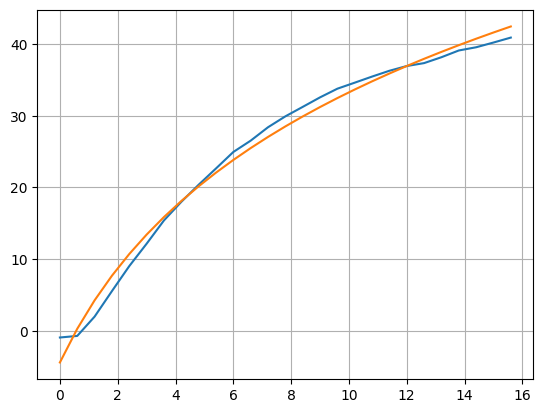

In [138]:
# xTherm,yTherm = interp1d(x1,y1)

newTherm = interp1d(x1,y1)
newCoup = interp1d(x2,y2)

diff = (newTherm(x2) - newCoup(x2))#/(-.0021)
# diff /= diff[-1]
a,b = np.polyfit(x2,diff,1)
popt,pcov = curve_fit(test,x2,diff)
plt.plot(x2,diff)
# plt.plot(x2,a*x2+b)
plt.plot(x2,test(x2,*popt))
plt.grid()
print(r2(diff,a*x2+b))
;

print(*popt)
print(test(4,*popt))#/-.0021)

C:\Users\JoshWhitehead\AppData\Local\Temp\ipykernel_8384\95640067.py:4: RuntimeWarning: divide by zero encountered in divide
  return (a*np.log(t+b)+c)/x
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


c:\Users\JoshWhitehead\AppData\Local\Programs\Python\Python311\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


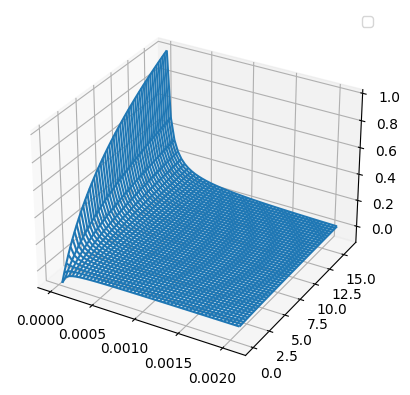

In [139]:
x = np.linspace(0,.0021)
t = np.linspace(0,16)
def dTdx(x,t,a,b,c):
    return (a*np.log(t+b)+c)/x
def test(t,a,b,c):
    return a*np.log(b+x)+c
xx,tt = np.meshgrid(x,t)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(xx,tt,dTdx(xx,tt,*popt))
ax.legend()
# plt.show()

